In [3]:
import pandas as pd
import datetime as dt
import numpy as np

df_train = pd.read_csv("train.csv")

df_train.describe()

,year_week,product_number,reporterhq_id,specs,display_size,sales_units,inventory_units
count,15454.000000,15454.000000,15454.000000,15454.000000,15454.000000,14963.000000,14961.000000
mean,202240.709202,127194.308076,42.140740,112262.542837,15.163543,25.974938,71.726222
std,61.596666,77503.015241,34.910293,63619.857944,1.422376,29.392055,66.145326
min,201915.000000,6909.000000,3.000000,967.000000,11.000000,0.000000,0.000000
25%,202218.000000,58233.000000,15.000000,58987.000000,14.000000,3.000000,26.000000
50%,202239.000000,116466.000000,24.000000,109271.000000,15.600000,16.000000,56.000000
75%,202304.000000,196413.000000,78.000000,157621.000000,15.600000,38.000000,97.000000
max,202318.000000,247737.000000,96.000000,236915.000000,17.300000,186.000000,399.000000


In [4]:
import seaborn as sb

In [5]:
df_train.dtypes

id                  object
date                object
year_week            int64
product_number       int64
reporterhq_id        int64
prod_category       object
specs                int64
display_size       float64
segment             object
sales_units        float64
inventory_units    float64
dtype: object

In [6]:
re_id = df_train["reporterhq_id"]

In [7]:
pr_id = df_train["product_number"]

In [8]:
results = []

for i, j in list(zip(re_id, pr_id)):
    val = len(df_train[(df_train["product_number"]==j) & (df_train["reporterhq_id"] == i)])
    results.append(val)

#print(results)

<AxesSubplot: ylabel='Count'>

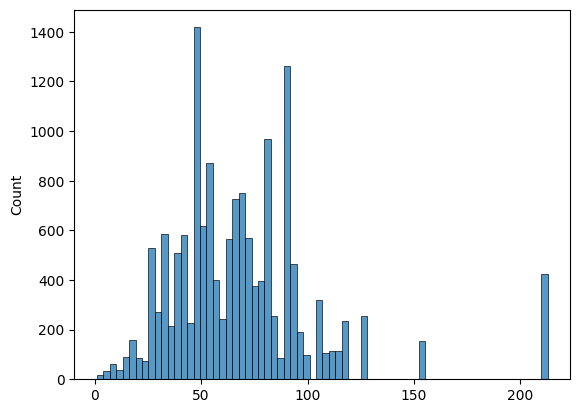

In [9]:
sb.histplot(results)

In [10]:
date_id = df_train["date"]

In [11]:
df_train.sample(10)

,id,date,year_week,product_number,reporterhq_id,prod_category,specs,display_size,segment,sales_units,inventory_units
7471,202249-112518,2022-12-10,202249,112518,12,Conan,157621,15.6,Premium,20.0,288.0
9191,202205-163842,2022-02-05,202205,163842,3,Luffy,53185,14.0,Core,37.0,41.0
7163,202317-107583,2023-04-29,202317,107583,6,Clover,206938,15.6,Core,13.0,51.0
14404,202248-236880,2022-12-03,202248,236880,12,Goku,97667,15.6,Core,16.0,22.0
5794,202238-86856,2022-09-24,202238,86856,3,Goku,172126,15.6,Core,28.0,81.0
10578,202244-184569,2022-11-05,202244,184569,24,Clover,93799,17.3,Core,10.0,88.0
15328,202229-247737,2022-07-23,202229,247737,3,Arale,10637,13.3,Premium,NaN,53.0
13088,202252-222075,2022-12-31,202252,222075,12,Doraemon,39647,16.1,Gaming,6.0,98.0
13542,201949-233919,2019-12-07,201949,233919,3,Clover,106370,15.6,Core,42.0,37.0
3162,202309-45402,2023-03-04,202309,45402,21,Conan,147951,13.5,Premium,14.0,121.0


In [12]:
print(len(df_train["id"]) == len(df_train["id"].unique()))

False


In [13]:
import matplotlib.pyplot as plt

In [14]:
df_train = df_train.sort_values(by = ["date"])

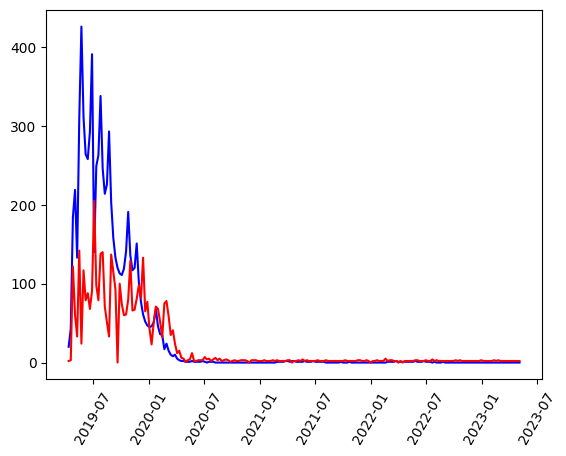

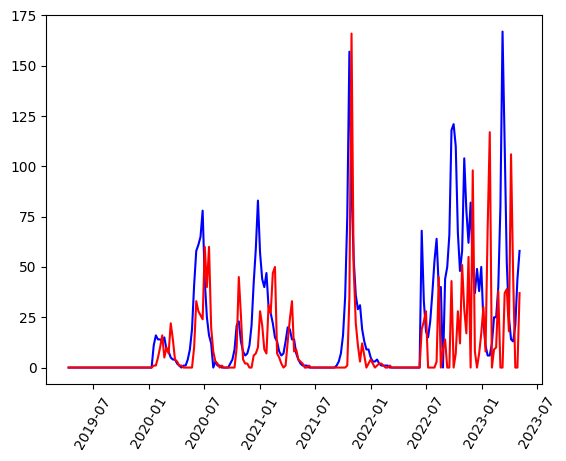

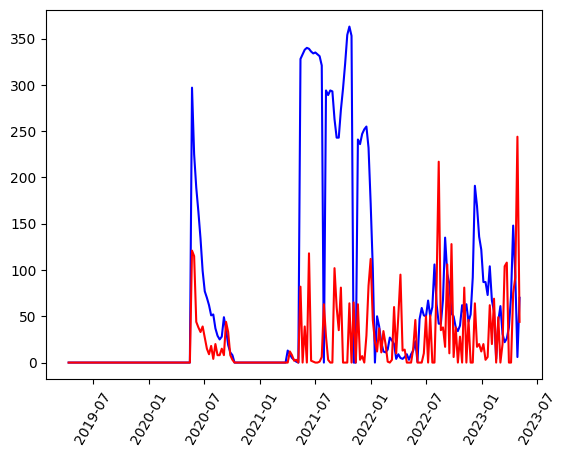

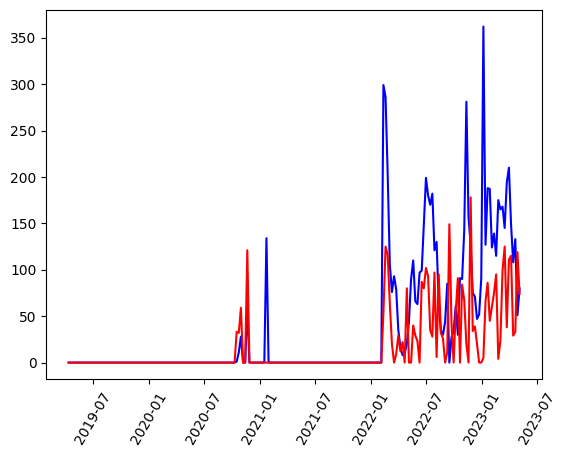

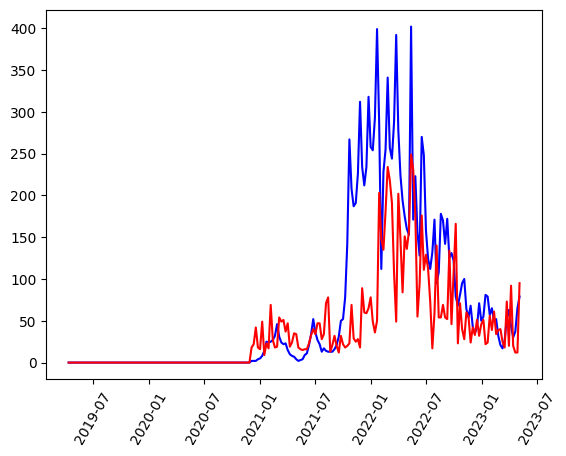

KeyboardInterrupt: 

In [15]:
#Create graphics inventory and sales over time
list_id = df_train["product_number"].unique()
list_da = df_train["date"].unique()

for p in list_id:
    x = []
    y = []
    y2 = []
    for d in list_da:
        val = df_train[(df_train['product_number']==p) & (df_train['date']==d)]['inventory_units'].sum()
        val2 = df_train[(df_train['product_number']==p) & (df_train['date']==d)]['sales_units'].sum()
        x.append(d)
        y.append(val)
        y2.append(val2)
    
    #print(res)
    x = np.asarray(x, dtype='datetime64[s]')
    plt.plot(x,y, color = 'blue')
    plt.plot(x,y2, color = 'red')
    plt.tick_params(axis='x', labelrotation=60)
    plt.show()

In [ ]:
pd.DatetimeIndex(df_train['date']).month.unique()

Int64Index([4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3], dtype='int64', name='date')

In [ ]:
sales_per_month = []

for m in range (1,13): 
    aux = df_train[pd.DatetimeIndex(df_train['date']).month == m]["sales_units"].sum()
    sales_per_month.append(aux)


<AxesSubplot: >

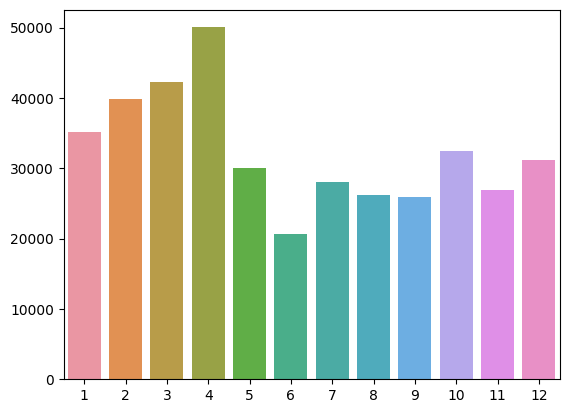

In [ ]:
sb.barplot(x = list(range(1,13)), y = sales_per_month)

In [ ]:
import matplotlib.pyplot as plt

for p in list_id:
    pr_sales_per_month = []

    for m in range (1,13): 
        aux = df_train[(pd.DatetimeIndex(df_train['date']).month == m) & (df_train["product_number"]==p)]["sales_units"].sum()
        pr_sales_per_month.append(aux)

    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(list(range(1,13)), pr_sales_per_month)
    plt.show()
    
